<a href="https://colab.research.google.com/github/Ritvik10/Titanic-Dataset-EDA-Exploratory-Data-Analysis-Celebal-Technologies-Training/blob/main/Titanic_Dataset_EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
df=pd.read_csv('/content/titanic.csv')

In [36]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# **Categorical Columns**

*   Survived
*   PClass
*   Sex
*   Parch
*   Embarked

# **Numerical Columns**

*   Age
*   Fare
*   PassengerId

# **Numerical Columns**

*   Name
*   Ticket
*   Cabin


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It indicates that there are total of 891 passesnger details among which 177 people's Age is missing and 687 people's Cabin details are missing. And 2 people's Embarkation details are missing.



In [38]:
df.shape

(891, 12)

In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the training set:

1. 38.3% people survived

2. More number of people were actually in 3rd class

3. 50% of passengers were in between the age of 20 to 38

In [40]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Few conclusions**

1. Missing values in Age, Cabin and Embarked columns
2. More than 70 percent values are missing in cabin columns, will have to drop
3. Few columns have inappropriate data types

In [41]:
# Dropping cabin column

df.drop(columns=['Cabin'],inplace=True)

In [42]:
# Imputing missing values for age
# Strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [43]:
# Imputing missing values for embarked

# finding the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is

df['Embarked'].fillna('S', inplace=True)

In [44]:
# Imputing missing values for embarked

# finding the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is

df['Embarked'].fillna('S', inplace=True)

In [45]:
df['Parch'].value_counts()


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# **Changing data type for the following cols**
1. Survived(category)
2. PClass(category)
3. Sex(category)
4. Age(int)
5. Embarked(category)

In [46]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

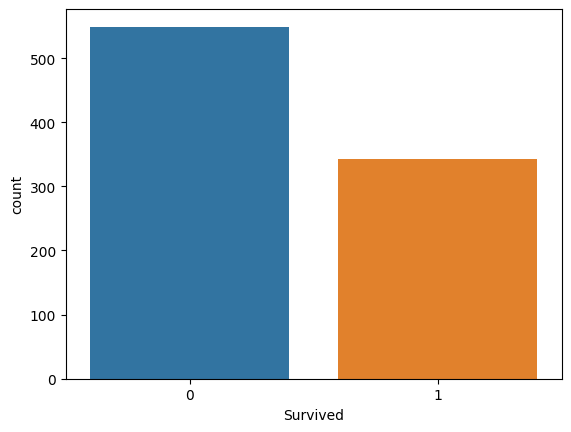

In [47]:
sns.countplot(x='Survived', data=df);

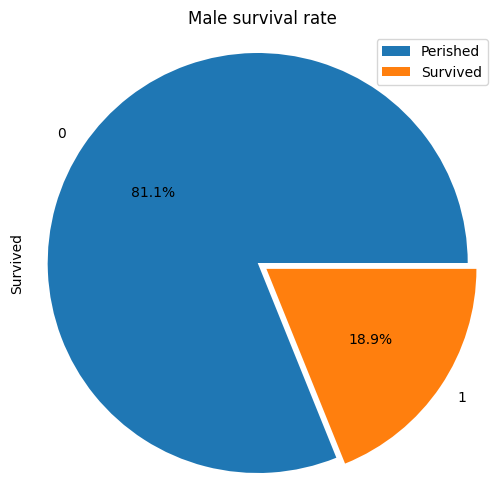

In [48]:
df[df['Sex'] == 'male'].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Male survival rate")
plt.show()

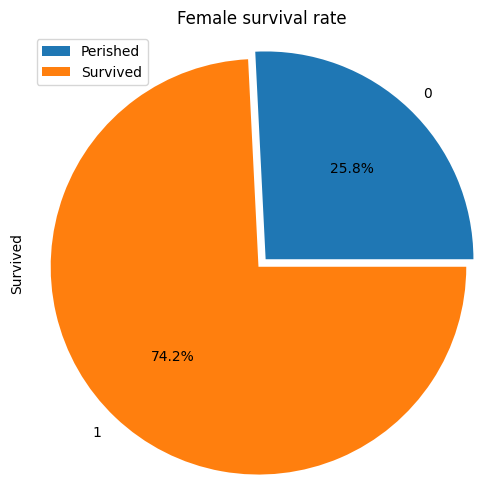

In [49]:
df[df['Sex'] == 'female'].Survived.groupby(df.Survived).count().plot(kind='pie',autopct='%1.1f%%',figsize=(6, 6),explode=[0,0.05])
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(["Perished","Survived"])
plt.show()

The above 2 plots says the females were given more priority than male in the survival process. That too there is a significant difference between the two.

So now if we choose just Sex as the only feature and say all females survived and all men perished, then we would end up with an accuracy of 78.67%

In [50]:
pd.crosstab(df.Pclass, df.Survived, margins=True)


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


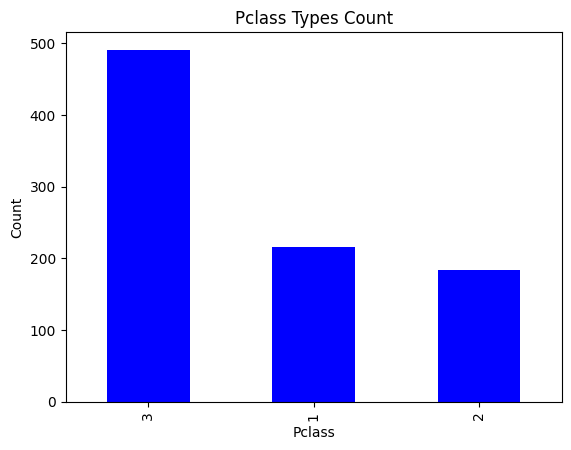

In [51]:
df.Pclass.value_counts().head(20).plot(kind = 'bar', color = 'b');
plt.xlabel('Pclass')
plt.ylabel('Count');
plt.title('Pclass Types Count');

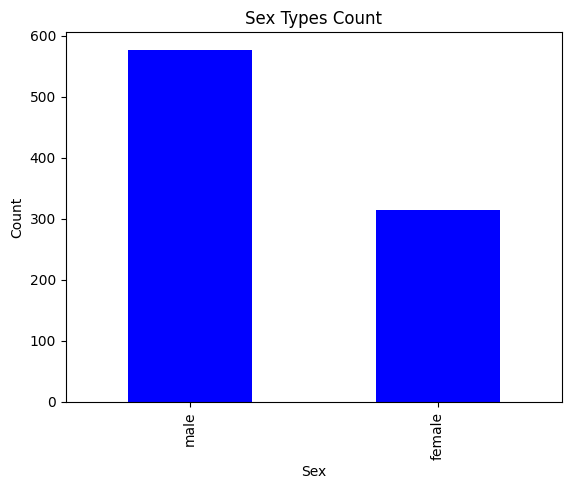

In [52]:
df.Sex.value_counts().head(20).plot(kind = 'bar', color = 'b');
plt.xlabel('Sex')
plt.ylabel('Count');
plt.title('Sex Types Count');

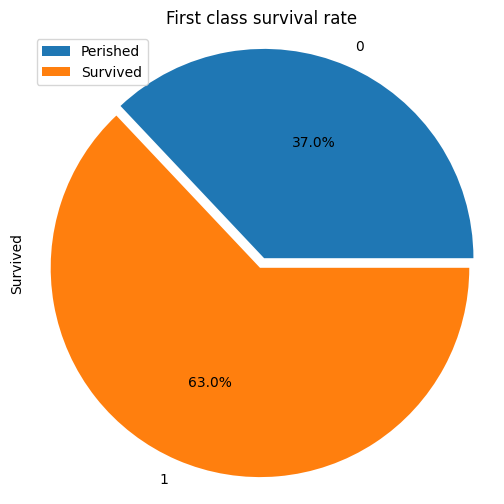

In [53]:
df[df['Pclass'] == 1].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("First class survival rate")
plt.show()

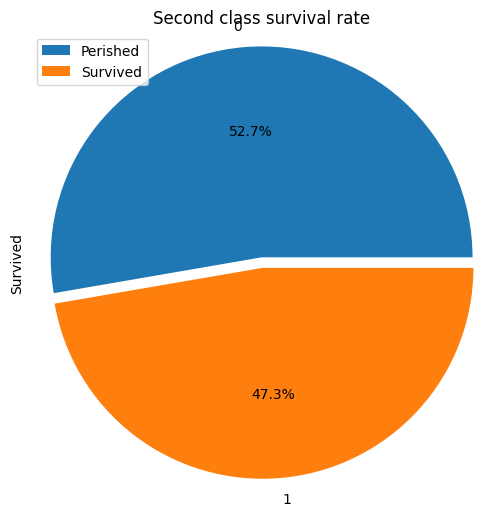

In [54]:
df[df['Pclass'] == 2].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Second class survival rate")
plt.show()

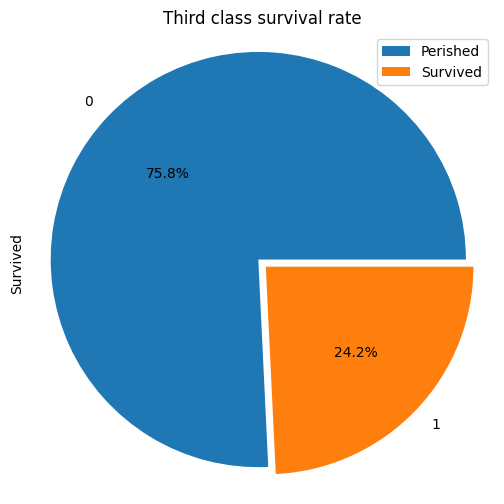

In [55]:
df[df['Pclass'] == 3].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Third class survival rate")
plt.show()

In [56]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True)


Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

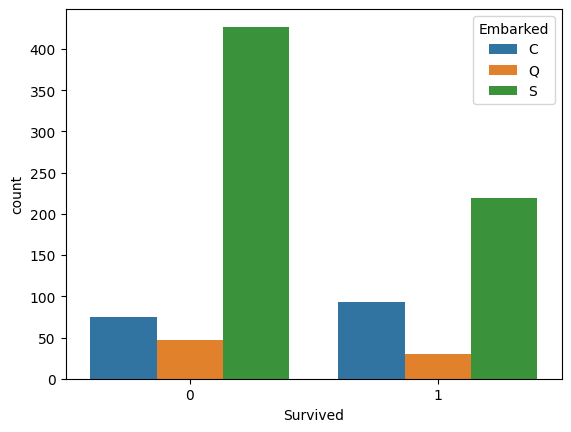

In [57]:
sns.countplot(x='Survived', data=df,hue = 'Embarked');


In [58]:
pd.crosstab([df.Sex, df.Survived], [df.Parch, df.Pclass], margins=True)


Parch              0             1           2          3     4     5  6  All
Pclass             1    2    3   1   2   3   1   2   3  2  3  1  3  3  3     
Sex    Survived                                                              
female 0           1    5   35   0   1  13   2   0  17  0  1  0  2  3  1   81
       1          63   40   50  17  17  12  11  11   8  2  1  0  0  1  0  233
male   0          63   81  260  10   7  22   3   3  15  0  1  1  1  1  0  468
       1          36    8   36   4   7   8   5   2   3  0  0  0  0  0  0  109
All              163  134  381  31  32  55  21  16  43  2  3  1  3  5  1  891

The above crosstab indicates 2 things:

1. Most of the passerenges didn'y had siblings onboard and the majority had atmost 1 sibling onboard

2. Not much of priority was given to the passengers who had sibelings onboard in the rescue operation

In [59]:
df.corr()


<ipython-input-59-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.033741,-0.057527,-0.001652,0.012658
Age,0.033741,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.093856,0.159651,0.216225,1.000000


The above correlation table indicated below features:

1. The Age was not a priority in the rescue operation similat to the sibelings and parents column as correlation with the target variable is very low

2. There should have been a higher correlation between the Fare and Pclass

<Axes: xlabel='Pclass', ylabel='Fare'>

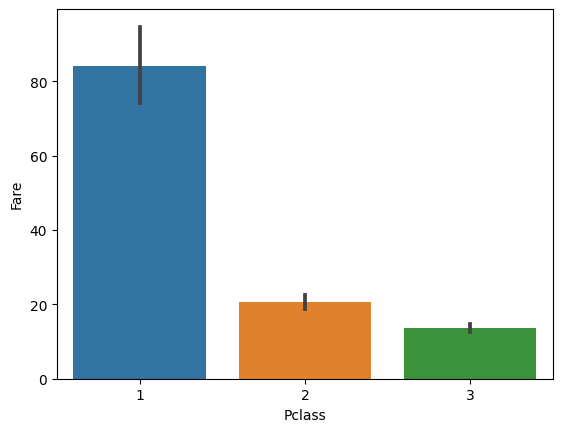

In [60]:
sns.barplot(y = "Fare",x = "Pclass",data = df)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


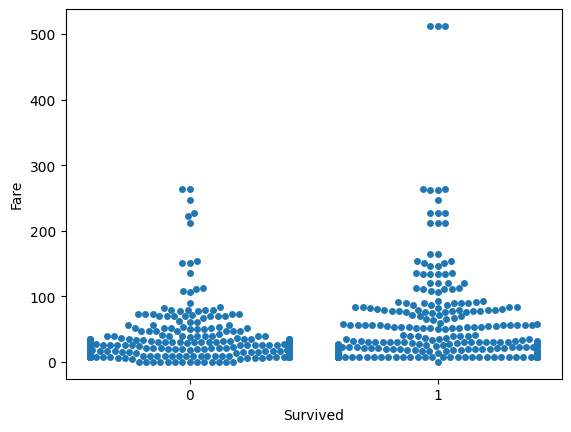

In [61]:
sns.swarmplot(x='Survived', y='Fare', data=df);


<Axes: xlabel='Pclass', ylabel='Fare'>

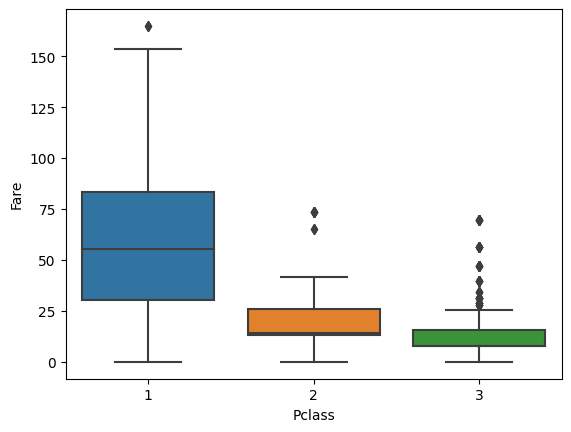

In [62]:
sns.boxplot(y = "Fare",x = "Pclass",data = df[df["Fare"] < 200])


<Axes: xlabel='Pclass', ylabel='Fare'>

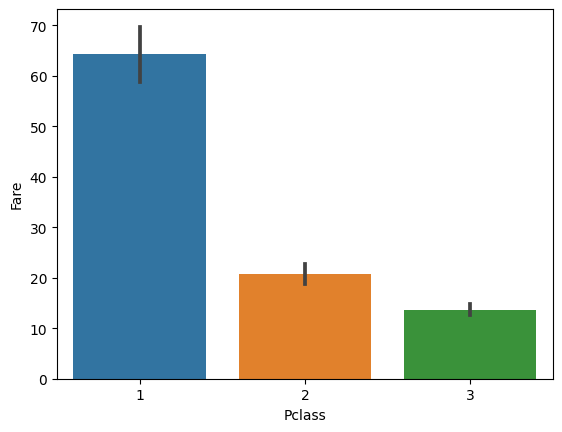

In [63]:
sns.barplot(y = "Fare",x = "Pclass",data = df[df["Fare"] < 200])


<ipython-input-66-ce823ca53eb8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


0.45956263424701577
0.9865867453652877


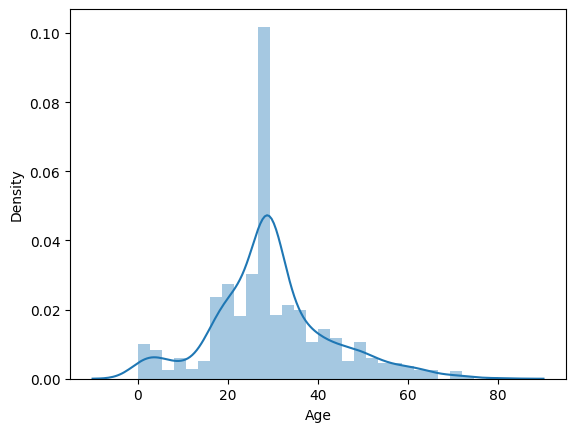

In [66]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

<Axes: >

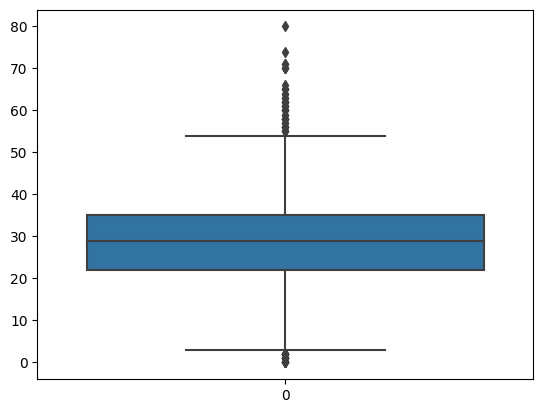

In [67]:
sns.boxplot(df['Age'])


In [68]:
# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


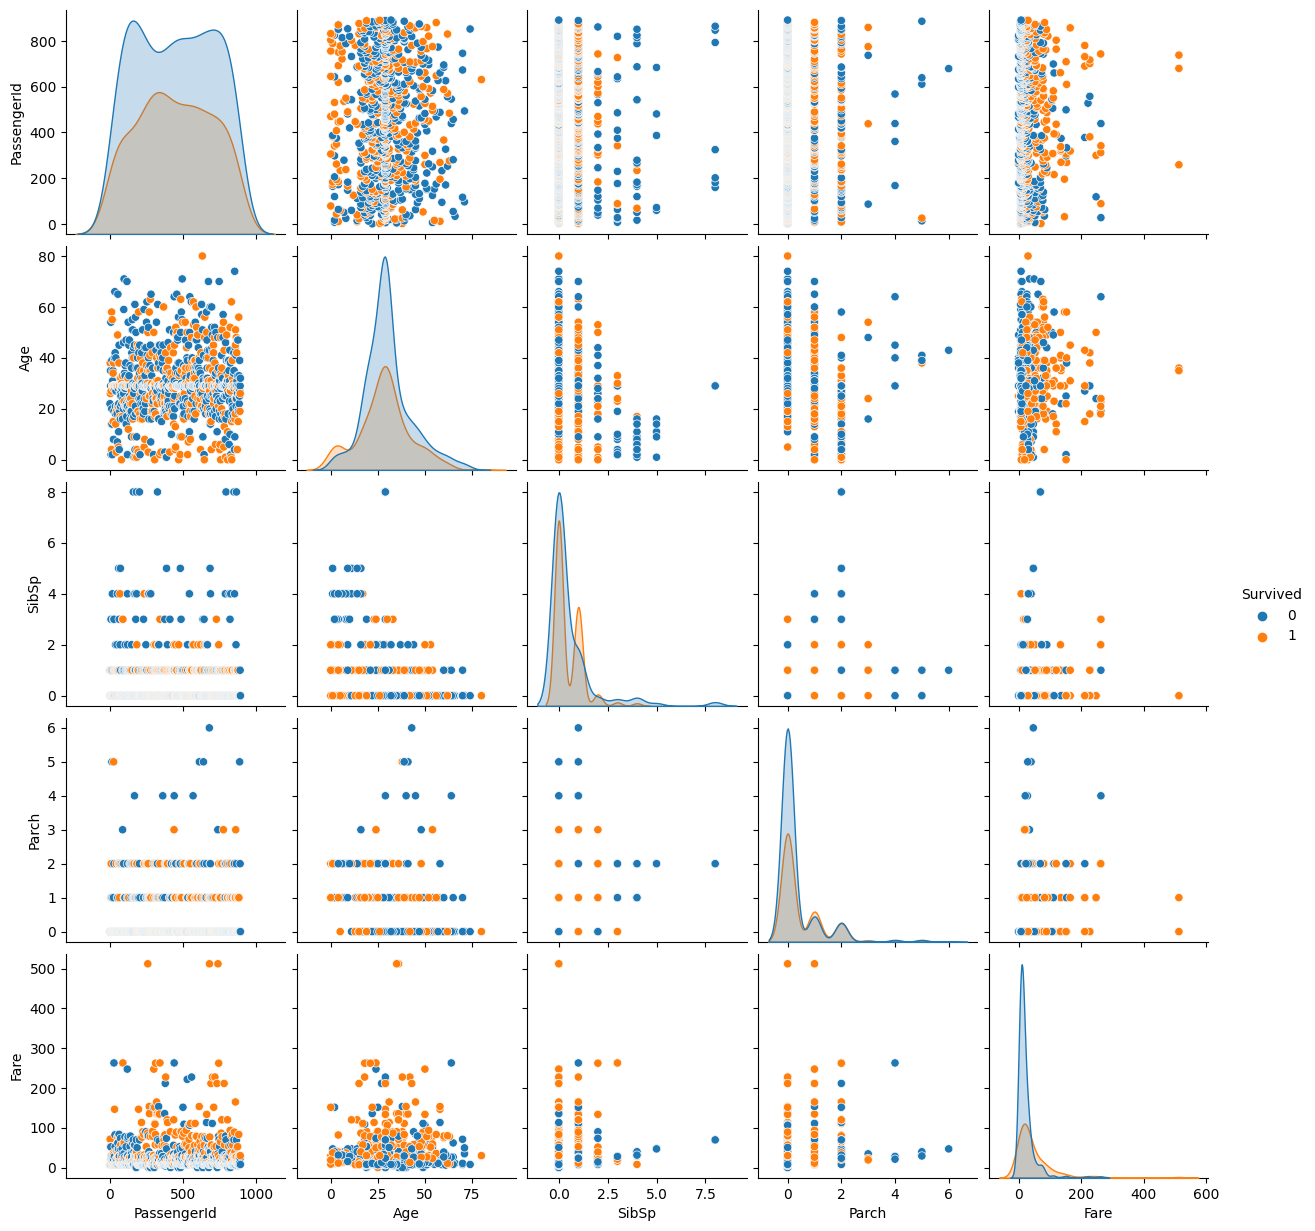

In [64]:
sns.pairplot(df.drop("Name",axis = 1).dropna(),hue = "Survived")


<ipython-input-65-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

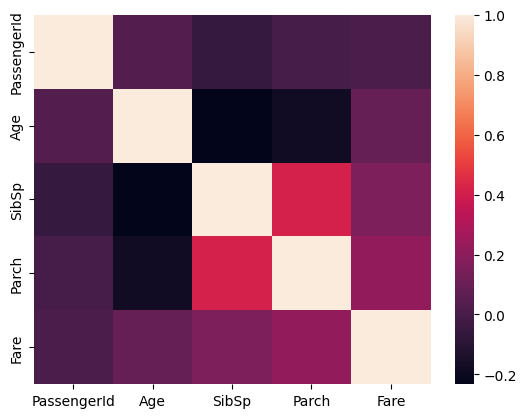

In [65]:
sns.heatmap(df.corr())


# **Conclusions**

*   Chance of female survival is higher than male survival
*   Travelling in Pclass 3 was deadliest
*   Somehow, people going to C survived more
*   People in the age range of 20 to 40 had a higher chance of not surviving




